<a href="https://colab.research.google.com/github/PurnaPrakashNissy10/MyURLshortnerproject/blob/main/Fraud_detection_DataAnalysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/data2.csv')
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [10]:
from sklearn.preprocessing import LabelEncoder

#categorical columns
df['Profession_encoded'] = LabelEncoder().fit_transform(df['Profession'])
df['Expiry_encoded'] = LabelEncoder().fit_transform(df['Expiry'])

#columns for main analysis
df_filtered = df[['Profession_encoded', 'Income', 'Expiry_encoded', 'Fraud']]


In [11]:
df.describe()

,Income,Credit_card_number,Security_code,Fraud,Profession_encoded,Expiry_encoded
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,49761.20600,3.851363e+17,863.587800,0.501600,0.997800,59.843200
std,28837.72928,1.257950e+18,1484.424959,0.500022,0.820769,34.748113
min,1.00000,6.040296e+10,0.000000,0.000000,0.000000,0.000000
25%,24863.75000,1.800137e+14,275.000000,0.000000,0.000000,30.000000
50%,49483.00000,3.512440e+15,539.500000,1.000000,1.000000,60.000000
75%,74483.00000,4.594779e+15,813.250000,1.000000,2.000000,89.000000
max,99986.00000,4.999697e+18,9990.000000,1.000000,2.000000,120.000000


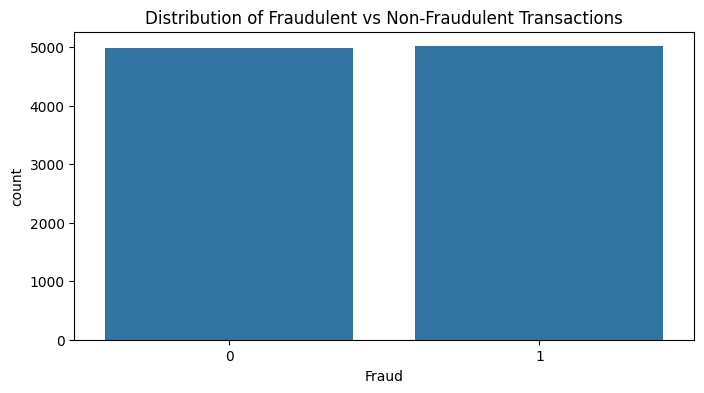

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(x='Fraud', data=df)
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions")
plt.show()

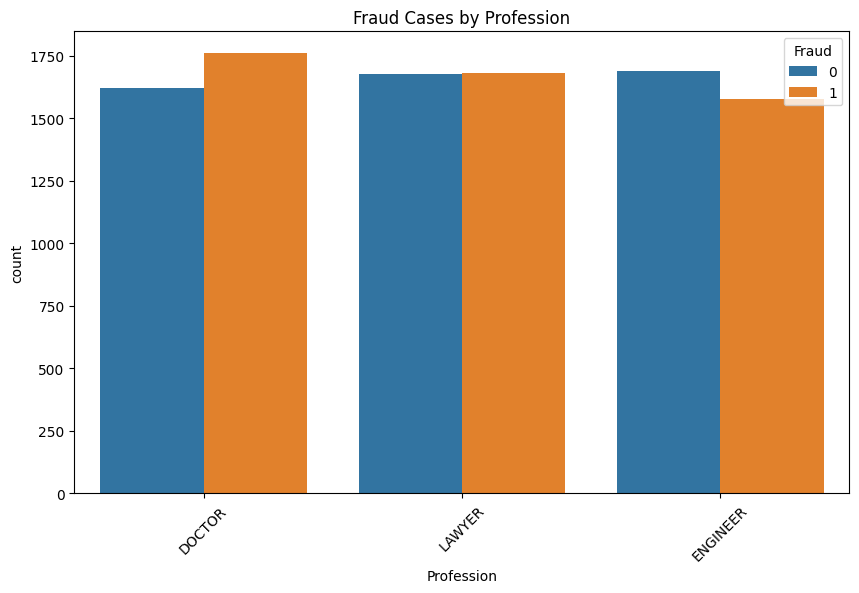

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Profession', hue='Fraud', data=df)
plt.title("Fraud Cases by Profession")
plt.xticks(rotation=45)
plt.show()

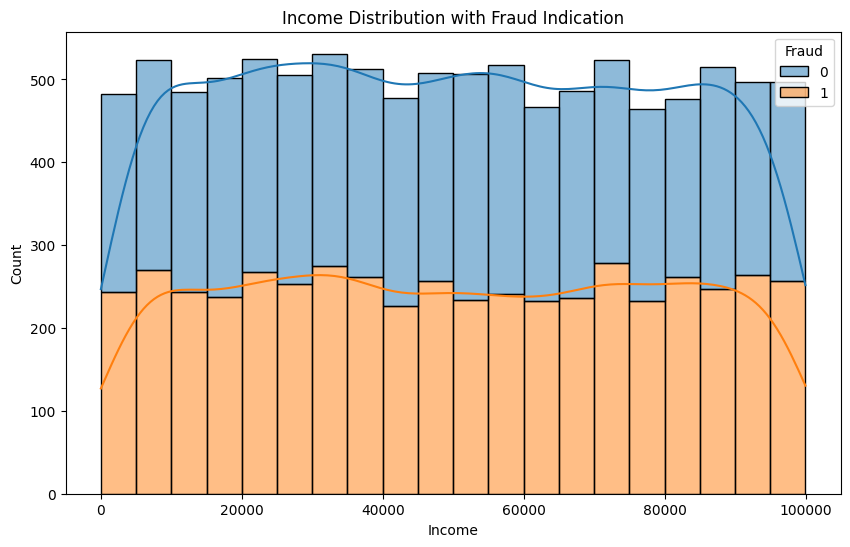

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', hue='Fraud', bins=20, kde=True, multiple='stack')
plt.title("Income Distribution with Fraud Indication")
plt.show()

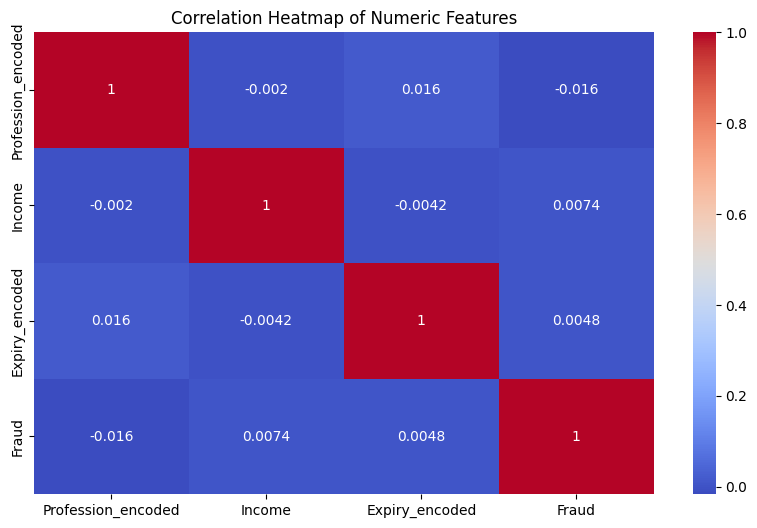

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [16]:
fraud_by_profession = df[df['Fraud'] == 1].groupby('Profession').size().sort_values(ascending=False)
print("Fraud Cases by Profession:\n", fraud_by_profession)

Fraud Cases by Profession:
 Profession
DOCTOR      1759
LAWYER      1681
ENGINEER    1576
dtype: int64


In [17]:
high_income_fraud = df[(df['Income'] > 70000) & (df['Fraud'] == 1)]
high_income_fraud.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,Profession_encoded,Expiry_encoded
1,DOCTOR,80334,213134223583196,05/32,858,1,0,47
2,LAWYER,91552,4869615013764888,03/30,755,1,2,25
21,LAWYER,74329,6592329894337538,11/25,469,1,2,101
24,DOCTOR,72324,36674486727001,05/33,783,1,0,48
31,DOCTOR,86156,30084059321297,02/34,962,1,0,19
